# พลอต scatter density ในพื้นที่ลุ่มน้ำระดับรายชั่วโมง

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../2results/df_org_dbz_rain_inbasin_120km.csv')


### นับจำนวนสถานีในลุ่มน้ำก่อน clean data

In [3]:
# Assuming your DataFrame is named df
unique_code_count = df['code'].nunique()
print("Number of unique codes:", unique_code_count)

Number of unique codes: 65


In [4]:
df.drop(df[df['rain_x'] <= 0].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True)

,cappi1km,cappi2km,cappi3km,cappi4km,full_date,code,rain_x
0,22.267728,22.656334,23.252944,23.492632,2018-06-01-01:00,CMSG,0.4
1,28.847841,28.025389,26.520176,24.078056,2018-06-01-02:00,CMSG,0.2
2,35.427362,33.911951,33.814425,34.668089,2018-06-01-03:00,CMSG,0.2
3,31.115211,31.477566,32.408463,33.207074,2018-06-01-04:00,CMSG,3.4
4,29.090362,29.558125,30.479992,31.064178,2018-06-01-04:00,NAN008,9.4
...,...,...,...,...,...,...,...
1701,35.262646,33.105425,30.091339,28.621504,2018-09-20-16:00,NMPR,2.2
1702,22.052814,24.789279,27.074918,27.700281,2018-09-20-16:00,TGSK,0.8
1703,21.603189,23.323372,24.247740,25.084608,2018-09-20-17:00,TGSK,0.2
1704,31.854776,31.898127,31.546525,29.810020,2018-09-21-14:00,PIN003,2.4


### นับจำนวนสถานีในลุ่มน้ำหลัง clean data

In [5]:
# Assuming your DataFrame is named df
unique_code_count = df['code'].nunique()
print("Number of unique codes:", unique_code_count)

Number of unique codes: 45


In [6]:
df.drop(columns=['cappi1km','cappi3km','cappi4km'], inplace=True) #ลบคอลัน์

In [7]:
df.rename(columns={"cappi2km": "dBZ_c2"}, inplace=True)
df.rename(columns={"rain_x":"rain_truth"}, inplace=True)
df

,dBZ_c2,full_date,code,rain_truth
52,22.656334,2018-06-01-01:00,CMSG,0.4
100,28.025389,2018-06-01-02:00,CMSG,0.2
144,33.911951,2018-06-01-03:00,CMSG,0.2
197,31.477566,2018-06-01-04:00,CMSG,3.4
211,29.558125,2018-06-01-04:00,NAN008,9.4
...,...,...,...,...
49473,33.105425,2018-09-20-16:00,NMPR,2.2
49489,24.789279,2018-09-20-16:00,TGSK,0.8
49545,23.323372,2018-09-20-17:00,TGSK,0.2
50610,31.898127,2018-09-21-14:00,PIN003,2.4


### คำนวณฝนประมาณค่าจากเรดาร์ค่าด้วย ZR Vectorized Operations:

In [8]:
#  Vectorized Operations:
constants = {
    'MP': (200, 1.6), # ZR marshall/palmer
    'RF': (250, 1.2), # ZR Rosenfeld
    'SC': (300, 1.4) # ZR Summer Deep Convection
}

for prefix, (a, b) in constants.items():
    for suffix in ['c2']:
        dBZ_column = f'dBZ_{suffix}'
        rr_column = f'rr_{prefix}_{suffix}'
        df[rr_column] = ((10**(df[dBZ_column]/10.))/a)**(1/b)

In [9]:
df

,dBZ_c2,full_date,code,rain_truth,rr_MP_c2,rr_RF_c2,rr_SC_c2
52,22.656334,2018-06-01-01:00,CMSG,0.4,0.950336,0.775791,0.706216
100,28.025389,2018-06-01-02:00,CMSG,0.2,2.057989,2.173530,1.707816
144,33.911951,2018-06-01-03:00,CMSG,0.2,4.801238,6.725314,4.496865
197,31.477566,2018-06-01-04:00,CMSG,3.4,3.382238,4.215481,3.013181
211,29.558125,2018-06-01-04:00,NAN008,9.4,2.565896,2.916713,2.197467
...,...,...,...,...,...,...,...
49473,33.105425,2018-09-20-16:00,NMPR,2.2,4.275090,5.761056,3.938228
49489,24.789279,2018-09-20-16:00,TGSK,0.8,1.291773,1.168127,1.002976
49545,23.323372,2018-09-20-17:00,TGSK,0.2,1.046085,0.881721,0.788103
50610,31.898127,2018-09-21-14:00,PIN003,2.4,3.593265,4.569766,3.228980


In [10]:
#### ดรอปคอมลัมน์ cappi ทิ้ง
df.drop(columns=['dBZ_c2'], inplace=True) #ลบคอลัน์

In [11]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,full_date,code,rain_truth,rr_MP_c2,rr_RF_c2,rr_SC_c2
0,2018-06-01-01:00,CMSG,0.4,0.950336,0.775791,0.706216
1,2018-06-01-02:00,CMSG,0.2,2.057989,2.173530,1.707816
2,2018-06-01-03:00,CMSG,0.2,4.801238,6.725314,4.496865
3,2018-06-01-04:00,CMSG,3.4,3.382238,4.215481,3.013181
4,2018-06-01-04:00,NAN008,9.4,2.565896,2.916713,2.197467
...,...,...,...,...,...,...
1701,2018-09-20-16:00,NMPR,2.2,4.275090,5.761056,3.938228
1702,2018-09-20-16:00,TGSK,0.8,1.291773,1.168127,1.002976
1703,2018-09-20-17:00,TGSK,0.2,1.046085,0.881721,0.788103
1704,2018-09-21-14:00,PIN003,2.4,3.593265,4.569766,3.228980


###  Correlation matrix analysis:

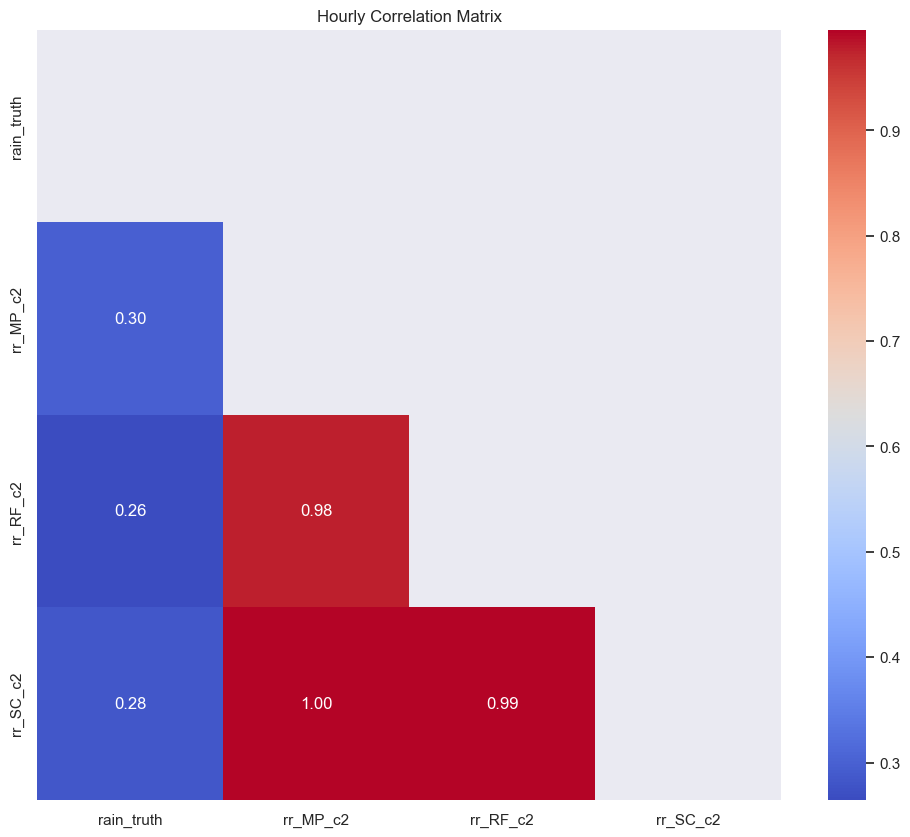

important_features_corr: ['rain_truth', 'rr_MP_c2', 'rr_SC_c2', 'rr_RF_c2']


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Create a mask for the lower triangular part
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the font scale for the heatmap
sns.set(font_scale=1.0)  # Adjust the font scale as needed

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title("Hourly Correlation Matrix")
plt.show()

# Identify features highly correlated with the target
correlation_with_target = correlation_matrix['rain_truth'].abs().sort_values(ascending=False)
important_features_corr = correlation_with_target[correlation_with_target > 0.20].index.tolist()
print('important_features_corr:', important_features_corr)

## Density scatter plot

In [14]:
def density_plot(rain_truth, rain_radar, max_=15):
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import gaussian_kde
    from scipy.stats import linregress
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    

    font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 22}

    plt.rc('font', **font)

    
    SMALL_SIZE = 12
    MEDIUM_SIZE = 14
    BIGGER_SIZE = 16

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    # data
    x = rain_radar
    y = rain_truth

    # Calculate the point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    # Set the desired colorbar range
    cbar_min = 0.01  # specify your minimum value
    cbar_max = 0.06 # specify your maximum value

    # Create scatter plot with density color map
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=z, s=40, cmap='rainbow', alpha=0.6, vmin=cbar_min, vmax=cbar_max)

    # Set x and y axis limits
    plt.xlim(0, max_)
    plt.ylim(0, max_)

    # Plot the 1:1 line
    plt.plot([0, max_], [0, max_], linestyle='--', color='grey', linewidth=2)

    # Set font size for axis labels and title
    plt.xlabel('radar rainfall [mm/hr]')
    plt.ylabel('gauge rainfall [mm/hr]')
    plt.title('Comparison hourly radar and gauge rainfall', fontsize=16)

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Density', fontsize=14)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(x, y))
    mse = mean_squared_error(x, y)
    mae = mean_absolute_error(x, y)
    r2 = r2_score(x, y)

    # Calculate p-value and correlation coefficient (r)
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Plot the regression line
    #plt.plot(x, slope * x + intercept, linestyle='-', color='magenta', linewidth=2,
    #         label=f'Regression Line (r={r_value:.2f}, p={p_value:.4f})')
    
    # Set font size for legend
    plt.legend(fontsize=12)

    # Display the plot
    plt.show()
    
    print(slope, intercept)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


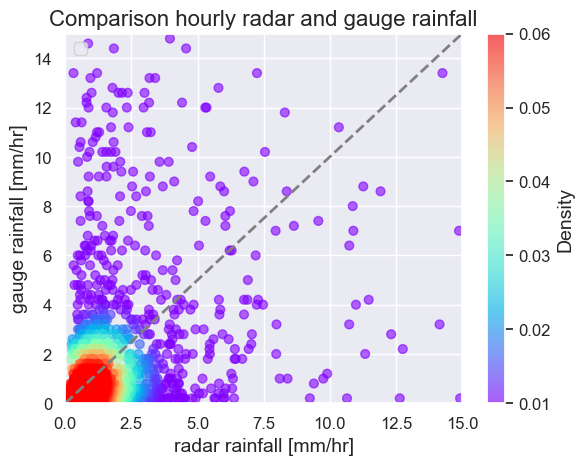

0.4062151789599778 1.4486978845601748


In [15]:
density_plot(df['rain_truth'],df['rr_MP_c2'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


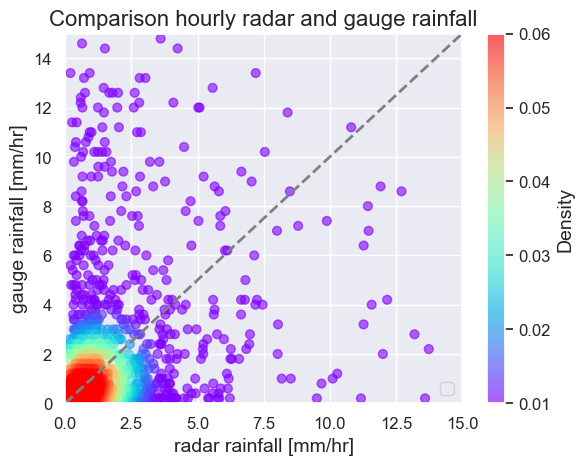

0.3306648817012626 1.6506457571369189


In [16]:
density_plot(df['rain_truth'],df['rr_SC_c2'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


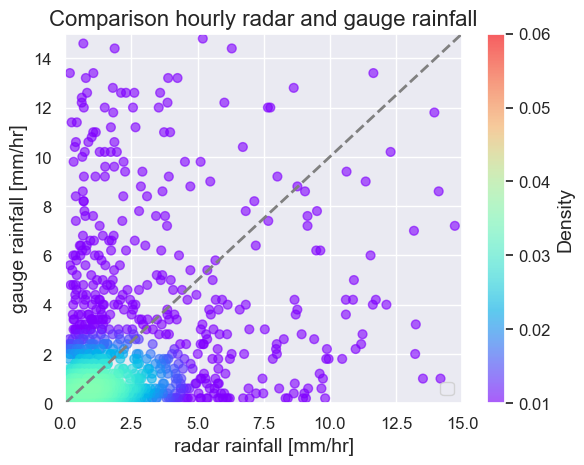

0.151079127541301 1.8317650152205809


In [17]:
density_plot(df['rain_truth'],df['rr_RF_c2'])